# Sentiment Analysis of The Royal Orchirds Garden Hotel Based on Reviews (English and Indonesian Reviews)

#### This analysis purposed to see the sentiments accoridng the reviews by TripAdvisor. The Hotel i choose is based the hotel that my family choose to stay during 2023 new year eve :), The Royal Orchirds Garden Hotel in Batu City, East Java, Indonesia. The data is completly open for public as TripAdvisor reviews can be seen public as well. This data was scraped with Data Miner extension by Chrome and later edited for analysis.  No intention to discredit the hotel performance at all

TripAdvisor: https://www.tripadvisor.ca/Hotel_Review-g1237079-d1222471-Reviews-or70-Royal_Orchids_Garden_Hotel-Batu_East_Java_Java.html

NLTK Documentation: https://www.nltk.org/api/nltk.sentiment.sentiment_analyzer.html

Data Miner Chrome Extension: https://dataminer.io/

# Importing Libraries

### The first step is to importing the libraries that i will use for this project. This project will use Sentiment Intensity Analyzer by nltk sentiment vader

In [1]:
#Importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# We can analyzing by using NLTK to import Sentiment Intensity Analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\WINDOWS
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Importing Data

### We will begin with English Reviews first

In [2]:
#Importing English Reviews data
reviews = pd.read_csv('reviews.csv')

In [3]:
reviews

,Review
0,this is old hotel but they still have a great ...
1,The pool and garden very nice.The room is spac...
2,"Stayed 3 night with my family, room is clean a..."
3,"We visited this hotel on weekend, like most ho..."
4,We stay at Junior Executive Room..a very recom...
...,...
94,This hotel has no air conditioner. Even though...
95,I don't really like this hotel. The room is no...
96,"Between the lack of air conditioning, the croa..."
97,This is our favorite hotel for staying in batu...


# Analyzing English Reviews

### Reviews will be devided to 3 categories: Positive, Negative, and Neutral

In [4]:
sentiments = SentimentIntensityAnalyzer()

In [5]:
reviews["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in reviews["Review"]]
reviews["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in reviews["Review"]]
reviews["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in reviews["Review"]]
print(reviews.head())

                                              Review  Positive  Negative  \
0  this is old hotel but they still have a great ...     0.411     0.000   
1  The pool and garden very nice.The room is spac...     0.053     0.000   
2  Stayed 3 night with my family, room is clean a...     0.405     0.000   
3  We visited this hotel on weekend, like most ho...     0.245     0.000   
4  We stay at Junior Executive Room..a very recom...     0.171     0.042   

   Neutral  
0    0.589  
1    0.947  
2    0.595  
3    0.755  
4    0.787  


In [6]:
x = sum(reviews["Positive"])
y = sum(reviews["Negative"])
z = sum(reviews["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


### Most of the reviews are Neutral according the Sentiment Intensity Analyzer

In [7]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  21.087000000000003
Negative:  4.400000000000001
Neutral:  73.51200000000001


# Percentage of Sentiments according the English reviews

In [8]:
print('Percentage of Positive Review: {}%'.format(x*100/len(reviews['Review'])))
print('Percentage of Negative Review: {}%'.format(y*100/len(reviews['Review'])))
print('Percentage of Neutral Review: {}%'.format(z*100/len(reviews['Review'])))

Percentage of Positive Review: 21.300000000000004%
Percentage of Negative Review: 4.4444444444444455%
Percentage of Neutral Review: 74.25454545454546%


### Based on the sentiment analysis, we can conclude that most of people have neutral sentiment on hotel (74%), however, the ngeative sentiment consist oly 4.4% which small number.

# Comparing with Reviews in Indonesian

### I decided to seperate the data to giving a comparison between local and foreign reviews

In [9]:
#Importing Indonesian Reviews data
reviews_indo = pd.read_csv('reviews indo.csv')
reviews_indo

,Review
0,Hotel yg sungguh sangat luar biasa arsitekturn...
1,"Saya menginap 26 Mei, awal sampai di hotel ta..."
2,"Kunjungan saat new normal,dapat harga flash sa..."
3,Hotel yang berada di pusat kota Batu ini menye...
4,hotel ini bisa menjadi salah satu alternatif s...
...,...
279,Kami menginap di kamar superior. Kamarnya cuku...
280,Favorit saya saat ini adalah ketika saya duduk...
281,Kami tinggal di royal orchid untuk 2 malam di ...
282,"untuk merayakan liburan weekand, saya bersama ..."


# Installing Vader-Multi

### Vader-Multi is able to read reviews that not in English

In [10]:
pip install vader-multi

Note: you may need to restart the kernel to use updated packages.


# Analyzing Indonesian Reviews

### Same as pervious analysis, it will devided into Positive, Neutral, and Negative reviews

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
reviews_indo["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in reviews_indo["Review"]]
reviews_indo["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in reviews_indo["Review"]]
reviews_indo["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in reviews_indo["Review"]]
print(reviews_indo.head())

                                              Review  Positive  Negative  \
0  Hotel yg sungguh sangat luar biasa arsitekturn...     0.211     0.000   
1  Saya menginap 26 Mei,  awal sampai di hotel ta...     0.133     0.071   
2  Kunjungan saat new normal,dapat harga flash sa...     0.134     0.000   
3  Hotel yang berada di pusat kota Batu ini menye...     0.206     0.022   
4  hotel ini bisa menjadi salah satu alternatif s...     0.084     0.000   

   Neutral  
0    0.789  
1    0.796  
2    0.866  
3    0.771  
4    0.916  


In [12]:
x = sum(reviews_indo["Positive"])
y = sum(reviews_indo["Negative"])
z = sum(reviews_indo["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


### Again, the result is that most of the reviews are neutral

In [13]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  60.59700000000003
Negative:  7.980999999999997
Neutral:  215.3800000000001


In [14]:
print('Percentage of Positive Review: {}%'.format(x*100/len(reviews_indo['Review'])))
print('Percentage of Negative Review: {}%'.format(y*100/len(reviews_indo['Review'])))
print('Percentage of Neutral Review: {}%'.format(z*100/len(reviews_indo['Review'])))

Percentage of Positive Review: 21.336971830985924%
Percentage of Negative Review: 2.8102112676056326%
Percentage of Neutral Review: 75.83802816901412%


### Based on the sentiment analysis, we can conclude that most of people have neutral sentiment on hotel (75.8%), however, the ngeative sentiment consist only 2.8% which much small number compared with english reviews.

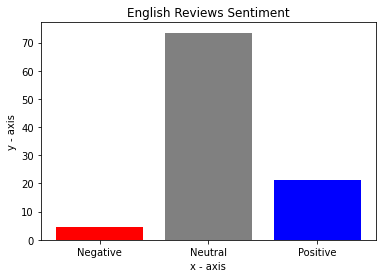

In [15]:
# x-coordinates of left sides of bars 
left = [1, 2, 3]
  
# heights of bars
height = [4.400000000000001, 73.51200000000001, 21.087000000000003]
  
# labels for bars
tick_label = ['Negative', 'Neutral', 'Positive']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'grey', 'blue'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('English Reviews Sentiment')
  
# function to show the plot
plt.show()

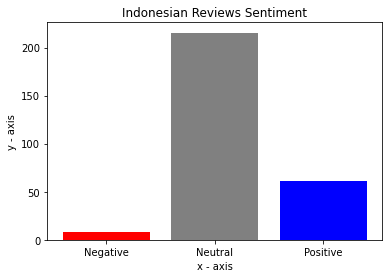

In [16]:
# x-coordinates of left sides of bars 
left = [1, 2, 3]
  
# heights of bars
height = [7.995999999999998, 215.39200000000008, 60.69100000000002]
  
# labels for bars
tick_label = ['Negative', 'Neutral', 'Positive']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'grey', 'blue'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Indonesian Reviews Sentiment')
  
# function to show the plot
plt.show()

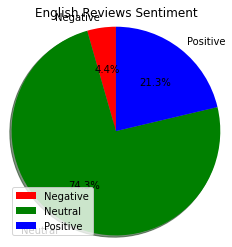

In [17]:
import matplotlib.pyplot as plt
  
# defining labels
activities = ['Negative', 'Neutral', 'Positive']
  
# portion covered by each label
slices = [4.400000000000001, 73.51200000000001, 21.087000000000003]
  
# color for each label
colors = ['r', 'g', 'b']
  
# plotting the pie chart
fig = plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
# plot title
plt.title('English Reviews Sentiment')

# plotting legend
plt.legend()

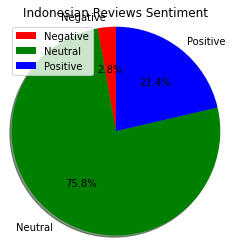

In [18]:
import matplotlib.pyplot as plt
  
# defining labels
activities = ['Negative', 'Neutral', 'Positive']
  
# portion covered by each label
slices = [7.995999999999998, 215.39200000000008, 60.69100000000002]
  
# color for each label
colors = ['r', 'g', 'b']
  
# plotting the pie chart
fig = plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0, 0, 0),
        radius = 1.2, autopct = '%1.1f%%')
# plot title
plt.title('Indonesian Reviews Sentiment')

# plotting legend
plt.legend()

# Conclusions

### 1. Both data show that arround 75% reviews show neutral sentiment, meanwhile positve sentiments got less than a quarter (21%) of data.
### 2. The negative sentiments are not much to worry about, it has 4.4% from English reviews and even 2.2% from Indonesian reviews

# Recommendations

### 1. Another deeper analysis on reviews are needed. We can get more insight from reviews if we digging  the data more. For example: finding keywords that determining the reviews
### 2. Hotel managers should start evaluating based on reviews. The satisfaction of visitor is the key performance indicator of hotel success. However, in order to understanding what visitor want, the hotel management should look to  the visitors feedback to getting know the visitors better. The managemnets can start by looking at the feedbacks from numerous hotel information website (such TripAdvisor and Traveloka)
### 3. It is important to be aware with the current marketing trends of based on the environment. The visitors who choose the hotel are attracted with any Tourist spots that surrounding the hotel. Visitors nowdays are willing that hotel provide any kind of service that match with their interest in hotel suroounding area
### 4. With a costumers and marketing trends orriented planning, the improvement of hotel may be achieved with low cost. Understanding costumers based on data and being aware with market trend in Batu city will help to develop marketing plan to improve the hotel quality services and ultimately, increasing the number of visitors. 

# References

### 1. https://studycorgi.com/hotel-management-performance-improvement-plan/
### 2. González-Ramírez, Reyes, et al. “ITCs in Hotel Management: A Research Review.” International Journal of Contemporary Hospitality Management, vol. 31 no.9, 2019, pp. 3583-3609.

# Thank You

# Your feedbacks on my analysis method are important :)